In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
dt = pd.read_csv('/content/ThoracicSurgery.csv')

In [ ]:
dt.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [ ]:
dt.isnull().any()

Diagnosis            False
FVC                  False
FEV1                 False
Performance          False
Pain                 False
Haemoptysis          False
Dyspnoea             False
Cough                False
Weakness             False
Tumor_Size           False
Diabetes_Mellitus    False
MI_6mo               False
PAD                  False
Smoking              False
Asthma               False
Age                  False
Death_1yr            False
dtype: bool

In [ ]:
dt.rename(columns = {'DGN': 'Diagnosis','PRE4':'FVC','PRE5':'FEV1','PRE6':'Performance','PRE7':'Pain','PRE8':'Haemoptysis','PRE9':'Dyspnoea',
                    'PRE10':'Cough','PRE11':'Weakness','PRE14':'Tumor_Size','PRE17':'Diabetes_Mellitus','PRE19':'MI_6mo','PRE25':'PAD','PRE30':'Smoking','PRE32':'Asthma','AGE':'Age','Risk1Yr':'Death_1yr'},inplace=True)
dt.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [ ]:
dt.replace(['F','T'],[0,1],inplace=True)

In [ ]:
dt.Diagnosis.replace({'DGN':''},regex=True,inplace=True)

In [ ]:
dt.Tumor_Size.replace({'OC1':''},regex=True,inplace=True)

In [ ]:
dt.Performance.replace({'PRZ':''},regex=True,inplace=True)

In [ ]:
dt.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['Diagnosis'] = le.fit_transform(dt['Diagnosis'])
dt['Performance'] = le.fit_transform(dt['Performance'])
dt['Tumor_Size'] = le.fit_transform(dt['Tumor_Size'])

In [ ]:
x = dt.drop(['Death_1yr'], axis = 1)
y = pd.DataFrame(dt['Death_1yr'])

<Axes: >

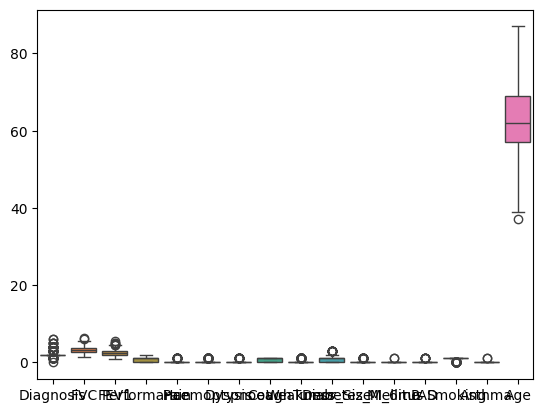

In [ ]:
sns.boxplot(data = x)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [ ]:
lx = x.columns.tolist()
ly = y.columns.tolist()
x = sc.transform(x)
x = pd.DataFrame(x, columns = lx)
y = y.values.tolist() # to maintain same indexing
y = pd.DataFrame(y, columns = ly)

<ipython-input-51-ac16510dcc01>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


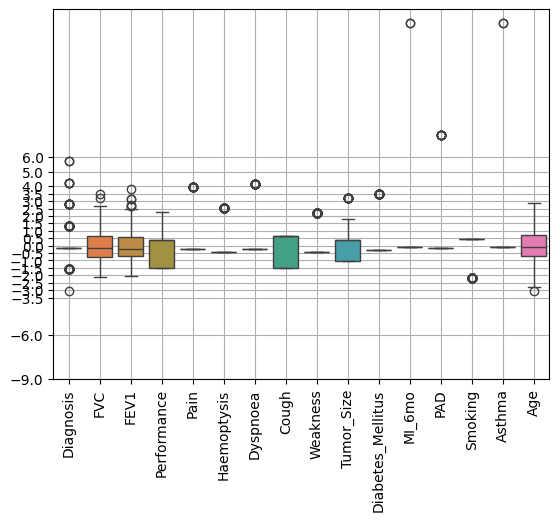

In [ ]:
import matplotlib.pyplot as plt
plot = sns.boxplot(x)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.yticks([-6,-5-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,5,6])
plt.grid()
plt.show()

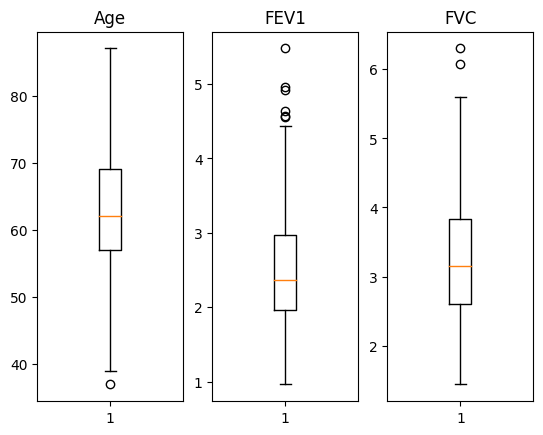

In [ ]:
fig, axs = plt.subplots(1,3)

axs[0].boxplot(dt.Age)
axs[0].set_title('Age')
axs[1].boxplot(dt.FEV1)
axs[1].set_title('FEV1')

axs[2].boxplot(dt.FVC)
axs[2].set_title("FVC")
plt.show()

In [ ]:
dt = dt[dt.Age > 30]
dt = dt[dt.FEV1 < 8]

In [ ]:
dt.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,2.088106,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,0.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.688082,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,0.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,2.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,2.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,2.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,6.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [ ]:
dt.corr()


,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
Diagnosis,1.000000,0.100113,0.094788,-0.035049,0.008417,-0.078977,-0.030945,-0.075534,-0.015906,-0.137575,0.036579,-0.008527,-0.017168,-0.086042,-0.008527,0.100958,0.070705
FVC,0.100113,1.000000,0.887545,-0.102612,0.001981,-0.103742,0.070158,-0.066180,-0.105544,0.037635,-0.120430,-0.009767,-0.037149,-0.012865,-0.062058,-0.299430,-0.045123
FEV1,0.094788,0.887545,1.000000,-0.138419,0.012140,-0.158771,0.024530,-0.134925,-0.128324,0.014588,-0.111169,-0.034237,-0.032890,-0.054192,-0.079098,-0.309617,-0.073388
Performance,-0.035049,-0.102612,-0.138419,1.000000,0.132116,0.129292,0.093149,0.692147,0.417734,0.101060,0.030971,0.025667,0.020144,0.176232,-0.036983,0.200226,0.094011
Pain,0.008417,0.001981,0.012140,0.132116,1.000000,0.225459,0.061782,-0.056551,-0.065151,0.094831,0.034604,-0.016727,-0.033678,-0.082988,-0.016727,0.057386,0.075141
Haemoptysis,-0.078977,-0.103742,-0.158771,0.129292,0.225459,1.000000,0.100836,0.067577,0.073938,0.050140,0.008696,-0.026454,0.092996,-0.022923,-0.026454,0.083440,0.081781
Dyspnoea,-0.030945,0.070158,0.024530,0.093149,0.061782,0.100836,1.000000,0.075556,-0.058753,0.077375,-0.031999,-0.016058,0.114452,-0.043642,-0.016058,0.001787,0.112979
Cough,-0.075534,-0.066180,-0.134925,0.692147,-0.056551,0.067577,0.075556,1.000000,0.199428,0.150563,0.024284,0.043958,0.015713,0.194116,-0.028350,0.131230,0.093019
Weakness,-0.015906,-0.105544,-0.128324,0.417734,-0.065151,0.073938,-0.058753,0.199428,1.000000,-0.034797,0.070072,0.057875,0.027763,0.114566,-0.030297,0.205717,0.083691
Tumor_Size,-0.137575,0.037635,0.014588,0.101060,0.094831,0.050140,0.077375,0.150563,-0.034797,1.000000,0.036253,-0.021976,-0.020558,0.043060,-0.021976,0.010370,0.168335


<Axes: >

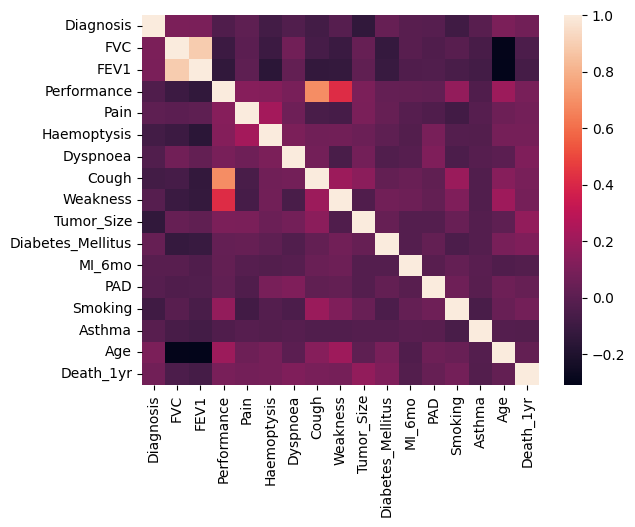

In [ ]:
sns.heatmap(dt.corr())

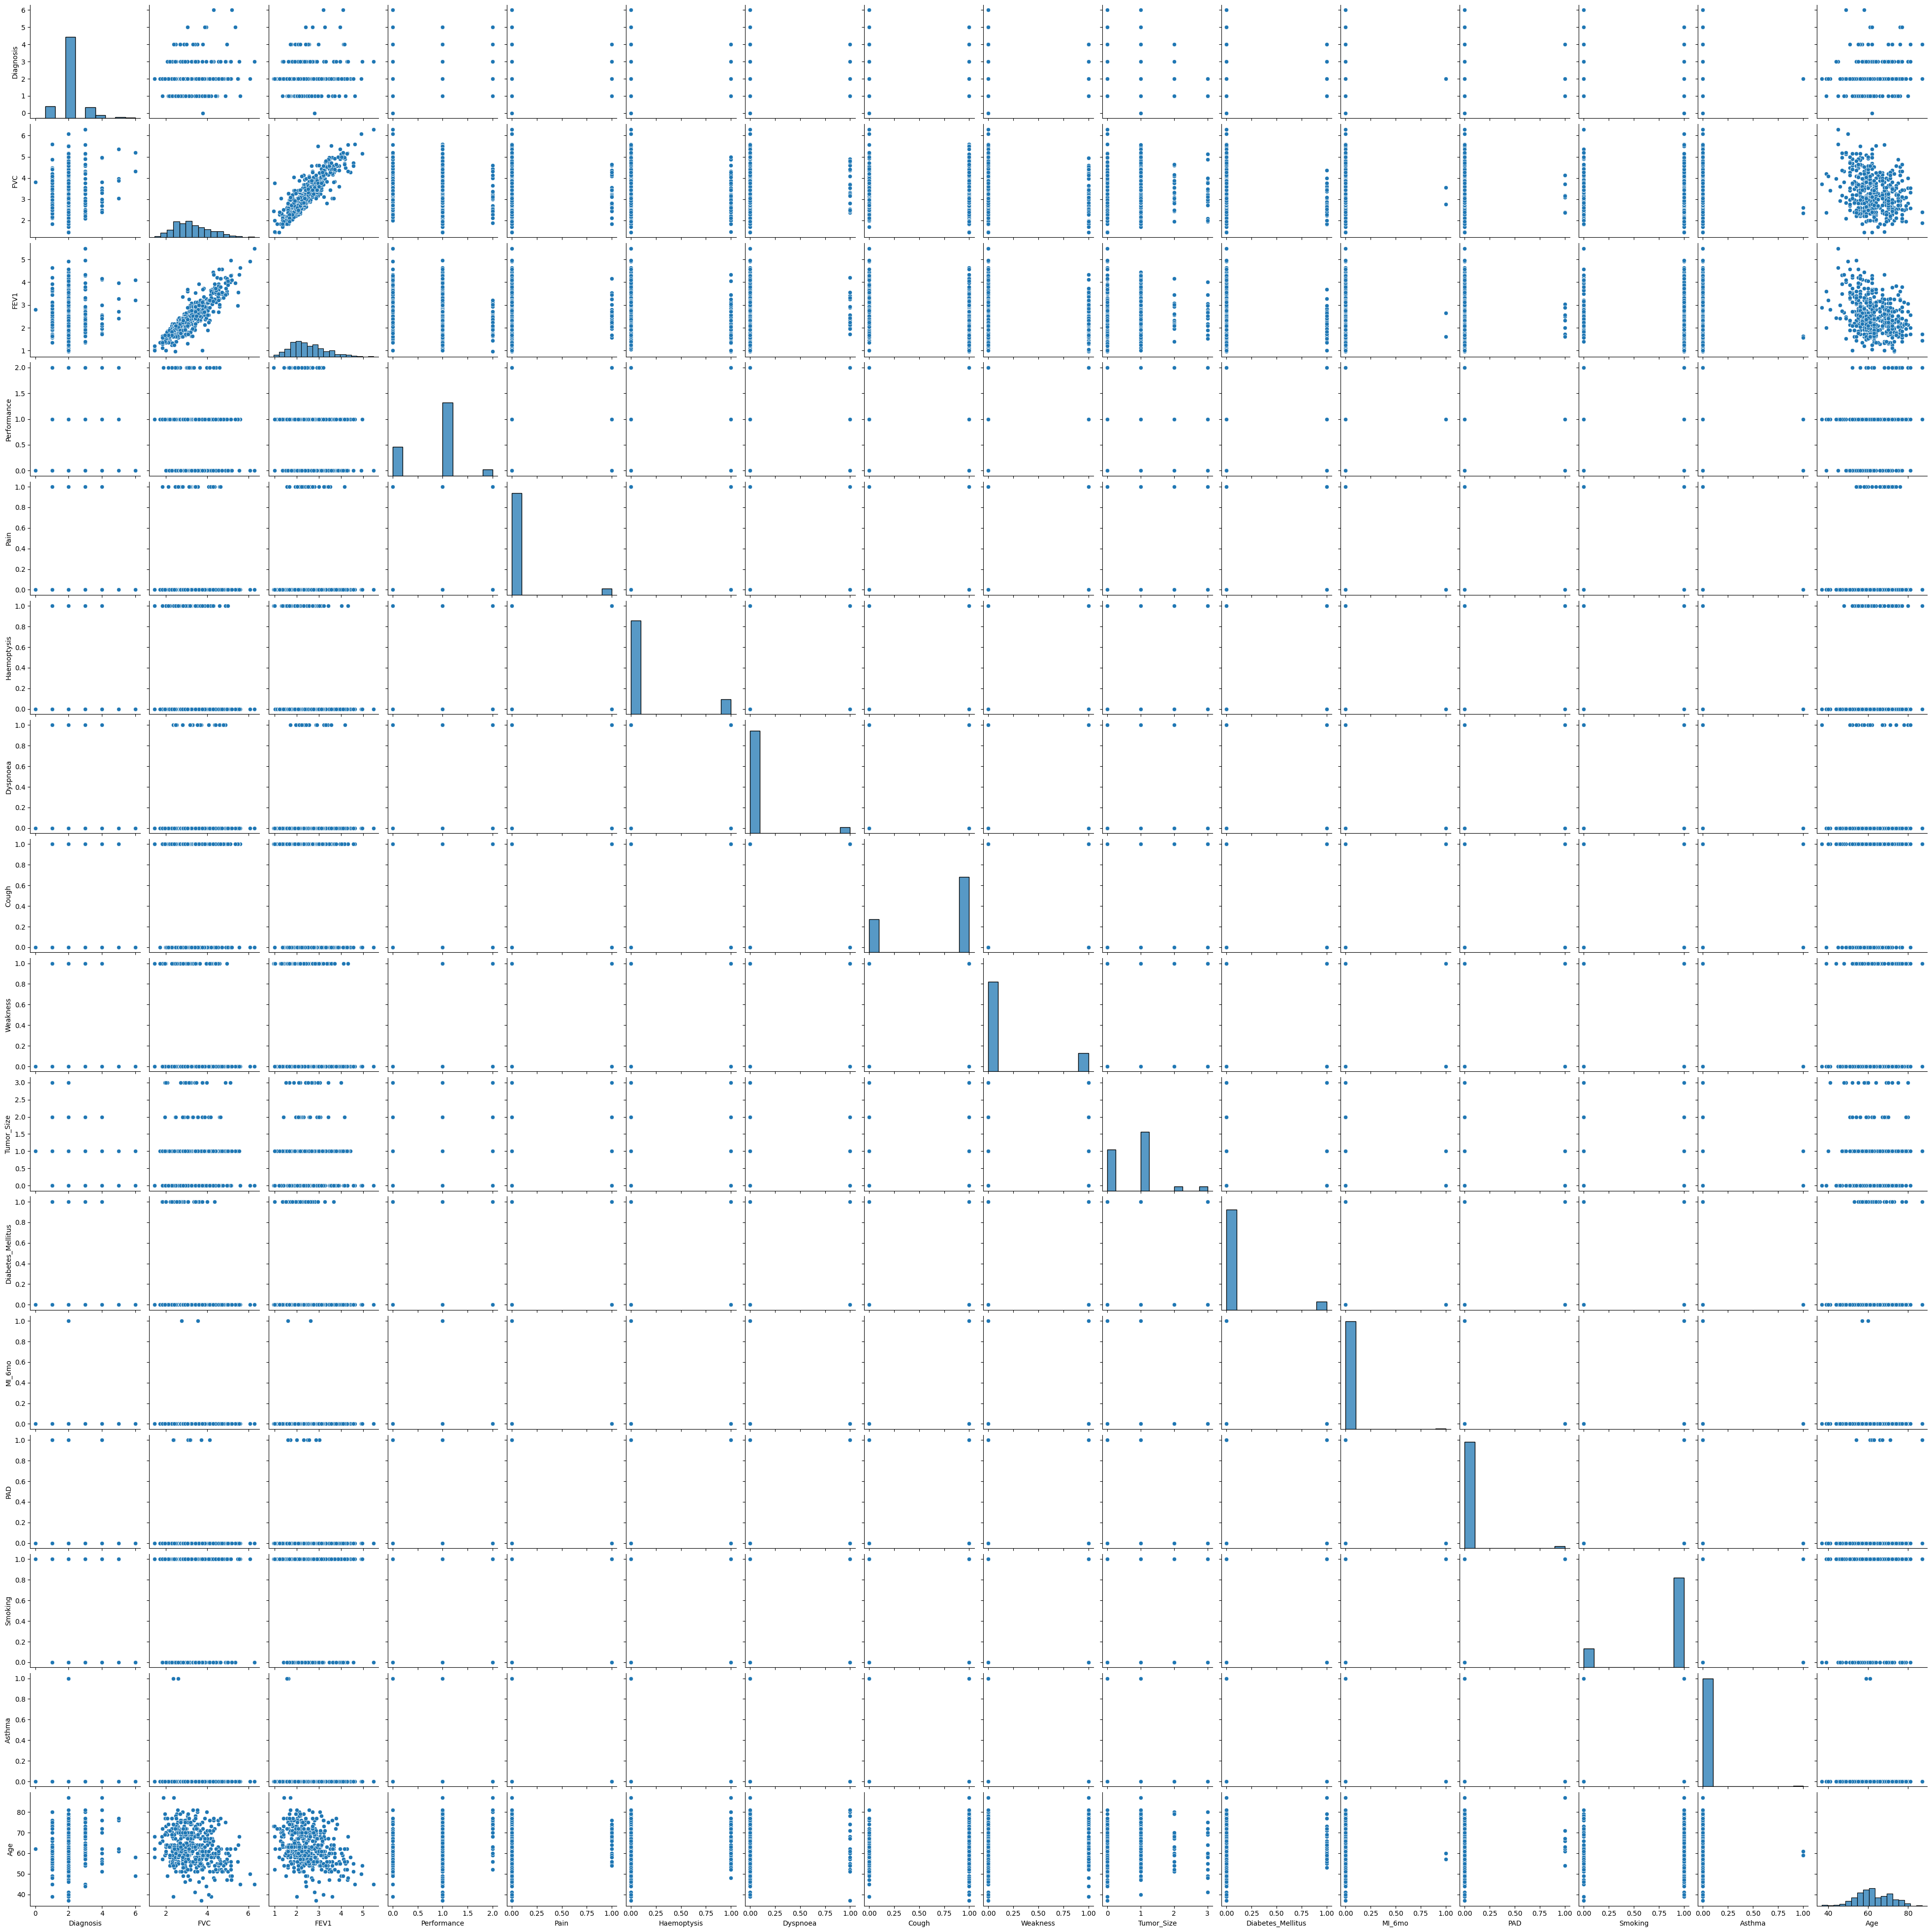

In [ ]:
sns.pairplot(x)

In [ ]:
y = dt['Death_1yr']
x = dt.drop(['Death_1yr'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
ypred = nb.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(ytest, nb.predict(xtest)))
print(accuracy_score(ytest, nb.predict(xtest)))
print(classification_report(ytest, nb.predict(xtest)))

[[ 3 90]
 [ 0 21]]
0.21052631578947367
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        93
           1       0.19      1.00      0.32        21

    accuracy                           0.21       114
   macro avg       0.59      0.52      0.19       114
weighted avg       0.85      0.21      0.11       114



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred = lr.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))

0.8157894736842105
[[93  0]
 [21  0]]


In [ ]:
import pickle as pkl
pkl.dump(lr,open('model.pkl','wb'))